In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [31]:
!wget "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile" -O Nowcasting_Zahlen_$(date -I -d yesterday).xlsx

--2020-05-11 17:58:01--  https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.rki.de (www.rki.de)... 104.18.13.73
Connecting to www.rki.de (www.rki.de)|104.18.13.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12154 (12K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Nowcasting_Zahlen_2020-05-10.xlsx’

Nowcasting_Zahlen_2 100%[===================>]  11,87K  --.-KB/s    in 0s      

2020-05-11 17:58:02 (133 MB/s) - ‘Nowcasting_Zahlen_2020-05-10.xlsx’ saved [12154/12154]



In [32]:
date = '2020-05-10'
data = pd.read_excel("./Nowcasting_Zahlen_{}.xlsx".format(date))
data.tail()

,Datum des Erkrankungsbeginns,Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung),Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glättung),Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glättung),Punktschätzer der Anzahl Neuerkrankungen,Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Punktschätzer der Reproduktionszahl R,Untere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Obere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R
61,2020-05-02,747,614,887,832,720,953,0.82,0.76,0.90
62,2020-05-03,832,628,1021,812,673,958,0.83,0.74,0.91
63,2020-05-04,982,753,1196,829,658,997,0.85,0.75,0.96
64,2020-05-05,1003,705,1351,891,675,1114,1.01,0.87,1.17
65,2020-05-06,936,525,1416,938,653,1246,1.13,0.94,1.35


In [33]:
measures=[
    ('2020-03-10', 'Major events cancelled'),
    ('2020-03-12', 'Merkel calls for avoiding social contacts'),
    ('2020-03-16', 'Shops, schools and day-care centres closed,\nReligious services prohibited, entry ban'),
]

antimeasures=[
    ('2020-04-20',"First relaxation of measures"),
]

In [34]:
to_date = pd.to_datetime

In [35]:
col_date = data.columns[0]
col_r = data.columns[-3]
col_rmin = data.columns[-2]
col_rmax = data.columns[-1]

last = {}
last['date'], last['r'], last['rmin'], last['rmax'] = data.iloc[-1][[col_date,col_r,col_rmin,col_rmax]]

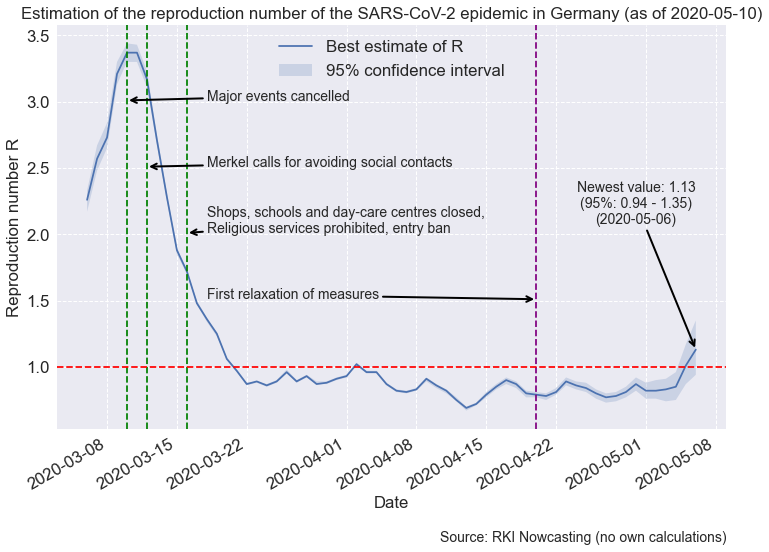

In [36]:
matplotlib.style.use('seaborn')
s = 1.5
fs = 'large'
params = {'font.size' : 14,
          'legend.fontsize': fs,
          'figure.figsize': (8*s,5.5*s),
          'axes.labelsize': fs,
          'axes.titlesize':fs,
          'xtick.labelsize':fs,
          'ytick.labelsize':fs,
          'axes.formatter.use_locale': True}
plt.rcParams.update(params)

arrowprops = {'arrowstyle': '->','lw':2}

fig = plt.figure()
plt.title("Estimation of the reproduction number of the SARS-CoV-2 epidemic in Germany (as of {})".format(date))
plt.figtext(0.9, 0.01, 'Source: RKI Nowcasting (no own calculations)', horizontalalignment='right')
plt.xlabel("Date")
plt.ylabel("Reproduction number R")
plt.plot(data[col_date],data[col_r],label="Best estimate of R")
plt.fill_between(data[col_date],data[col_rmin],data[col_rmax],alpha=0.2,label="95% confidence interval")

fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))

for m in measures:
    plt.axvline(to_date(m[0]),ls='--',c='green')
    
for m in antimeasures:
    plt.axvline(to_date(m[0]),ls='--',c='purple')
    
for idx, m in enumerate(measures+antimeasures):
    y=3.01-idx*0.5
    x=to_date(m[0])
    plt.annotate(m[1],(x,y),xytext=(to_date('2020-03-18'),y),arrowprops=arrowprops)
    
last_text = "Newest value: {:n}\n(95%: {:n} - {:n})\n({})".format(last['r'],last['rmin'],last['rmax'],last['date'].isoformat()[:10])
last_xy = (last['date'],last['r'])
last_xytext = (last['date']-pd.Timedelta(days=6),2.08)
plt.annotate(last_text,last_xy,last_xytext,arrowprops=arrowprops,ha='center')

plt.axhline(1,c='red',ls='--')
plt.grid(ls='--')
plt.legend()
plt.savefig("plot_{}.png".format(date),dpi=100)